In [17]:
import pandas as pd
import pickle
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
X_train = pd.read_csv('./Data/X_train_scaled.csv')
y_train = pd.read_csv('./Data/y_train.csv')
X_test = pd.read_csv('./Data/X_test_scaled.csv')
y_test = pd.read_csv('./Data/y_test.csv')

In [31]:
ridge_model = pickle.load(open('./Model/Ridge_Regressor.pkl', 'rb'))

In [32]:
#MAE
y_pred = ridge_model.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.025913450607359296

In [33]:
#RMSE
y_pred = ridge_model.predict(X_test)
mean_squared_error(y_pred, y_test, squared = False)

0.031322348001527486

In [14]:
from sklearn.inspection import permutation_importance

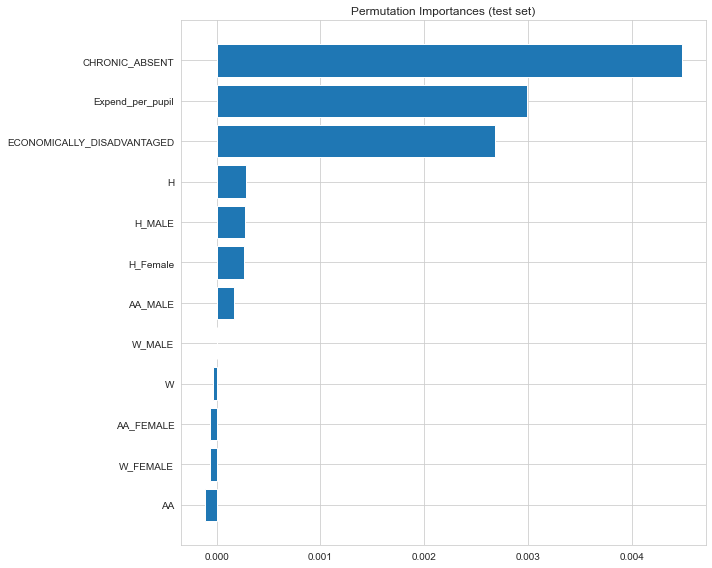

In [34]:
perm_importance = permutation_importance(ridge_model, X_test, y_test,n_jobs=-1,scoring = 'neg_mean_absolute_error',n_repeats=200)
sorted_idx = perm_importance.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(X_test.columns[sorted_idx],perm_importance.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()